In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

In [14]:
#loading the dataset
df = pd.read_csv('D:/Project-Fake_news_classifier/data/raw/WELFake_Dataset.csv')
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [15]:
#removing the index column: Unnamed: 0 and title column as focusing on the text

df = df.drop(columns=['Unnamed: 0','title'])

df.head()

,text,label
0,No comment is expected from Barack Obama Membe...,1
1,Did they post their votes for Hillary already?,1
2,"Now, most of the demonstrators gathered last ...",1
3,A dozen politically active pastors came here f...,0
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [16]:
#basic info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    72095 non-null  object
 1   label   72134 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


The shape of the dataframe: (72134, 2)


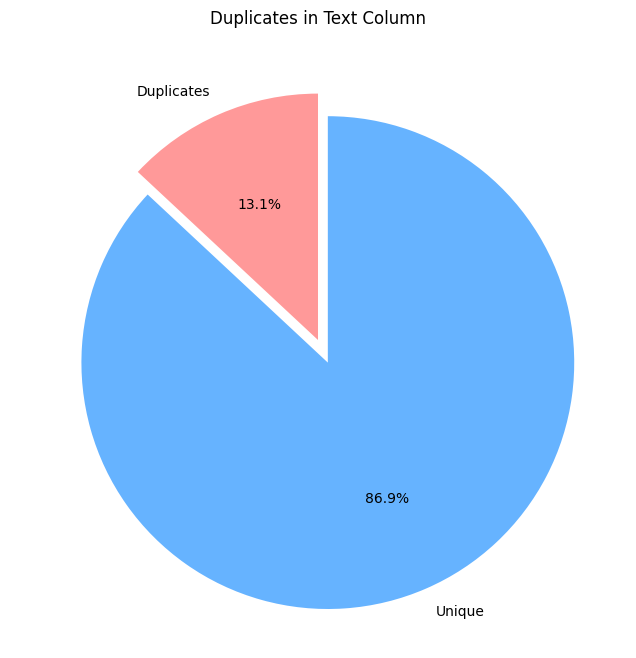

In [17]:
print('The shape of the dataframe:',df.shape)

# Sample DataFrame (replace this with your actual data)
# df = pd.read_csv("your_data.csv")

# Count the duplicates for each column
text_duplicates = df['text'].duplicated().sum()


# Create a DataFrame for plotting
data_text = [text_duplicates, len(df) - text_duplicates]

labels = ['Duplicates', 'Unique']

# Text column pie chart
plt.figure(figsize=(10,8))
plt.pie(data_text, labels=labels, autopct='%1.1f%%',explode=(0,0.1), startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Duplicates in Text Column')

plt.show()


In [18]:
#dropping the duplicates of text

df = df.drop_duplicates(subset = 'text',keep='first')

# print the shape
print('The shape of the dataframe is reduced from (72134, 2) to',df.shape)

The shape of the dataframe is reduced from (72134, 2) to (62719, 2)


text     1
label    0
dtype: int64


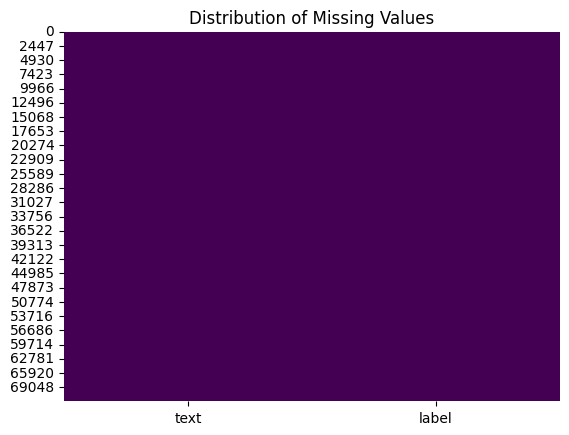

In [19]:
#Plotting the distribution of missing values

print(df.isnull().sum())


sns.heatmap(df.isnull(),cbar = False, cmap = 'viridis')
plt.title('Distribution of Missing Values')
plt.show()

In [20]:
#removing the values of the text as only 39 rows are null
df= df.dropna(axis=0)
print(df.isnull().sum())

text     0
label    0
dtype: int64


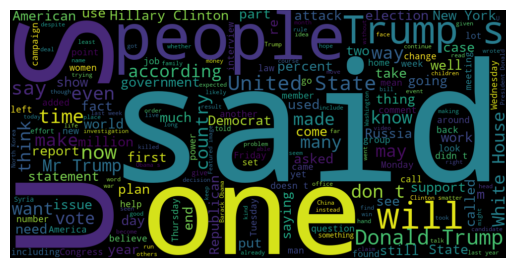

In [21]:
from wordcloud import WordCloud

text = " ".join(df['text'])

wordcloud = WordCloud(width=1000,height=500,background_color='black').generate(text)

plt.Figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [22]:
df.to_csv('D:/Project-Fake_news_classifier/data/processed/fake_news_eda.csv',index=False)

In [23]:
df.head()

,text,label
0,No comment is expected from Barack Obama Membe...,1
1,Did they post their votes for Hillary already?,1
2,"Now, most of the demonstrators gathered last ...",1
3,A dozen politically active pastors came here f...,0
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [24]:
df.label.value_counts()

label
0    34620
1    28098
Name: count, dtype: int64